In [1]:
with open("train.data", "r") as f:
    lines = f.readlines()
print(lines[0])
print(lines[1])

0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1

0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1



In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("train.data")
test_data,test_label=load_data("test.data")

In [4]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
        layers.Dense(57, activation='softmax'),
        layers.Dense(1, activation='sigmoid')])

In [5]:
batch_size = 20
epochs = 40

In [6]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_data,
                    train_label,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 1s 196us/step - loss: 0.6622 - acc: 0.7391 - val_loss: 0.6204 - val_acc: 0.8366
Epoch 2/40
3224/3224 [==============================] - 0s 76us/step - loss: 0.5821 - acc: 0.8614 - val_loss: 0.5290 - val_acc: 0.8896
Epoch 3/40
3224/3224 [==============================] - 0s 69us/step - loss: 0.4925 - acc: 0.8967 - val_loss: 0.4412 - val_acc: 0.9136
Epoch 4/40
3224/3224 [==============================] - 0s 69us/step - loss: 0.4212 - acc: 0.9104 - val_loss: 0.3808 - val_acc: 0.9274
Epoch 5/40
3224/3224 [==============================] - 0s 74us/step - loss: 0.3728 - acc: 0.9172 - val_loss: 0.3386 - val_acc: 0.9288
Epoch 6/40
3224/3224 [==============================] - 0s 71us/step - loss: 0.3383 - acc: 0.9231 - val_loss: 0.3079 - val_acc: 0.9339
Epoch 7/40
3224/3224 [==============================] - 0s 69us/step - loss: 0.3128 - acc: 0.9237 - val_loss: 0.2850 - val_acc: 0.9354
Epoch 

In [8]:
history_dict = history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

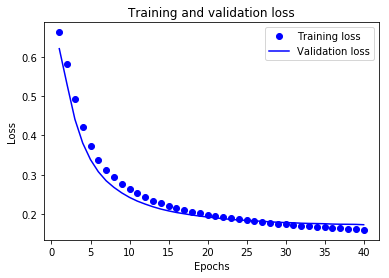

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

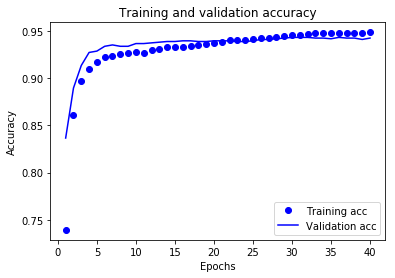

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
predictions = model.predict(train_data)

In [12]:
def load_prediction_data(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array([float(feature) for feature in sample])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
prediction_data=load_prediction_data(".\get_the_flag.data")

In [13]:
predictions = model.predict(prediction_data)

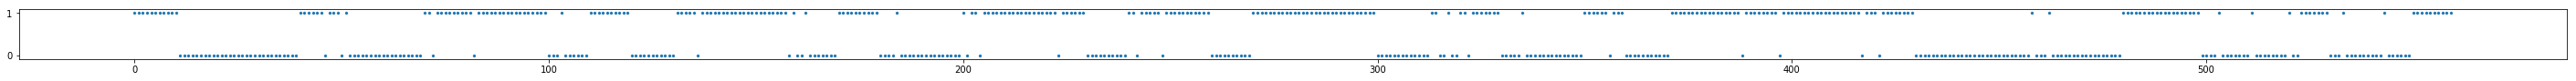

In [14]:
data_show=[]
for i in predictions:
    if i[0]<0.5:
        data_show.append(0)
    else:
        data_show.append(1)
plt.rcParams['figure.figsize'] = (50.0, 1.0) 
plt.scatter(range(len(data_show)),data_show,linewidth=0.1,s=10)
plt.show()

flag:10001001110101110100111011011100100101111110000011001001